In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from google.colab import files

sns.set_style('whitegrid')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [19]:
from google.colab import files

print("Selecione as 3 planilhas para upload:")
uploaded = files.upload()

#Carregar planilhas Excel
df_transacoes = pd.read_excel("PicMoney-Base_de_Transa__es_-_Cupons_Capturados-100000 linhas (1).xlsx")
df_lojas = pd.read_excel("PicMoney-Massa_de_Teste_com_Lojas_e_Valores-10000 linhas (1).xlsx")
df_pedestres = pd.read_excel("PicMoney-Base_Simulada_-_Pedestres_Av__Paulista-100000 linhas (1).xlsx")

print("Arquivos carregados com sucesso!")
print("Transações:", df_transacoes.shape)
print("Lojas:", df_lojas.shape)
print("Pedestres:", df_pedestres.shape)

Selecione as 3 planilhas para upload:


Saving PicMoney-Base_Simulada_-_Pedestres_Av__Paulista-100000 linhas (1).xlsx to PicMoney-Base_Simulada_-_Pedestres_Av__Paulista-100000 linhas (1) (1).xlsx
Saving PicMoney-Massa_de_Teste_com_Lojas_e_Valores-10000 linhas (1).xlsx to PicMoney-Massa_de_Teste_com_Lojas_e_Valores-10000 linhas (1) (1).xlsx
Saving PicMoney-Base_de_Transa__es_-_Cupons_Capturados-100000 linhas (1).xlsx to PicMoney-Base_de_Transa__es_-_Cupons_Capturados-100000 linhas (1) (1).xlsx
Arquivos carregados com sucesso!
Transações: (100001, 13)
Lojas: (10000, 11)
Pedestres: (100000, 15)


In [20]:
#Limpeza e Verificação de Qualidade dos Dados (Mais Segura)

def verificar_qualidade(df, nome_df):
    """
    Função que verifica e limpa os dados, reportando a qualidade.
    Utiliza uma estratégia de remoção mais seletiva para evitar perda total de dados.
    """
    print(f"--- VERIFICAÇÃO DE QUALIDADE: {nome_df} ---")

    # 1. Valores Ausentes
    print("\n1. Valores ausentes (antes da limpeza):")
    print(df.isnull().sum())

    # Remoção de linhas com NA APENAS em COLUNAS CRÍTICAS
    cols_criticas = []
    if nome_df == "Transações":
        cols_criticas = ['data', 'categoria_estabelecimento', 'repasse_picmoney']
    elif nome_df == "Lojas":
        cols_criticas = ['nome_loja', 'valor_compra']
    elif nome_df == "Pedestres":
        cols_criticas = ['idade', 'sexo']

    # Aplica a remoção seletiva
    df.dropna(subset=cols_criticas, inplace=True)

    # 2. Linhas Duplicadas
    linhas_duplicadas = df.duplicated().sum()
    print(f"\n2. Linhas duplicadas removidas: {linhas_duplicadas}")
    if linhas_duplicadas > 0:
        df.drop_duplicates(inplace=True)

    # 3. Conversão de Tipos (Datas)
    for col in ['data', 'data_captura', 'data_ultima_compra']:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)

    print("\nQualidade verificada e dados limpos.")
    print(f"Novo tamanho do DataFrame: {df.shape}")
    print("-" * 50)
    return df

# Aplica a limpeza e salva nas variáveis 'limpas'
df_transacoes_limpo = verificar_qualidade(df_transacoes.copy(), "Transações")
df_lojas_limpo = verificar_qualidade(df_lojas.copy(), "Lojas")
df_pedestres_limpo = verificar_qualidade(df_pedestres.copy(), "Pedestres")

--- VERIFICAÇÃO DE QUALIDADE: Transações ---

1. Valores ausentes (antes da limpeza):
celular                           1
data                              1
hora                              1
nome_estabelecimento              1
bairro_estabelecimento            1
categoria_estabelecimento         1
id_campanha                       1
id_cupom                          1
tipo_cupom                        1
produto                       66673
valor_cupom                       0
repasse_picmoney                  1
Unnamed: 12                  100000
dtype: int64

2. Linhas duplicadas removidas: 0

Qualidade verificada e dados limpos.
Novo tamanho do DataFrame: (100000, 13)
--------------------------------------------------
--- VERIFICAÇÃO DE QUALIDADE: Lojas ---

1. Valores ausentes (antes da limpeza):
numero_celular    0
data_captura      0
tipo_cupom        0
tipo_loja         0
local_captura     0
latitude          0
longitude         0
nome_loja         0
endereco_loja     0
valor_co


--- EXPLORAÇÃO: Top 10 Categorias e Repasse (Transações) ---

Top 10 categorias de estabelecimento:
categoria_estabelecimento
Farmácias e Drogarias                            6816
Lojas de Móveis e Decoração                      3479
Igrejas e Lojas de Artigos Religiosos            3441
Clínicas de Saúde e Bem-estar                    3415
Restaurantes e Gastronomia                       3410
Papelarias, Livrarias e Lojas de Escritório      3399
Supermercados e Mercados Express                 3378
Coworkings e Centros de Estudo/Conexão           3375
Bancos e Casas Lotéricas                         3354
Espaços Culturais e de Experiência Interativa    3353
Name: count, dtype: int64


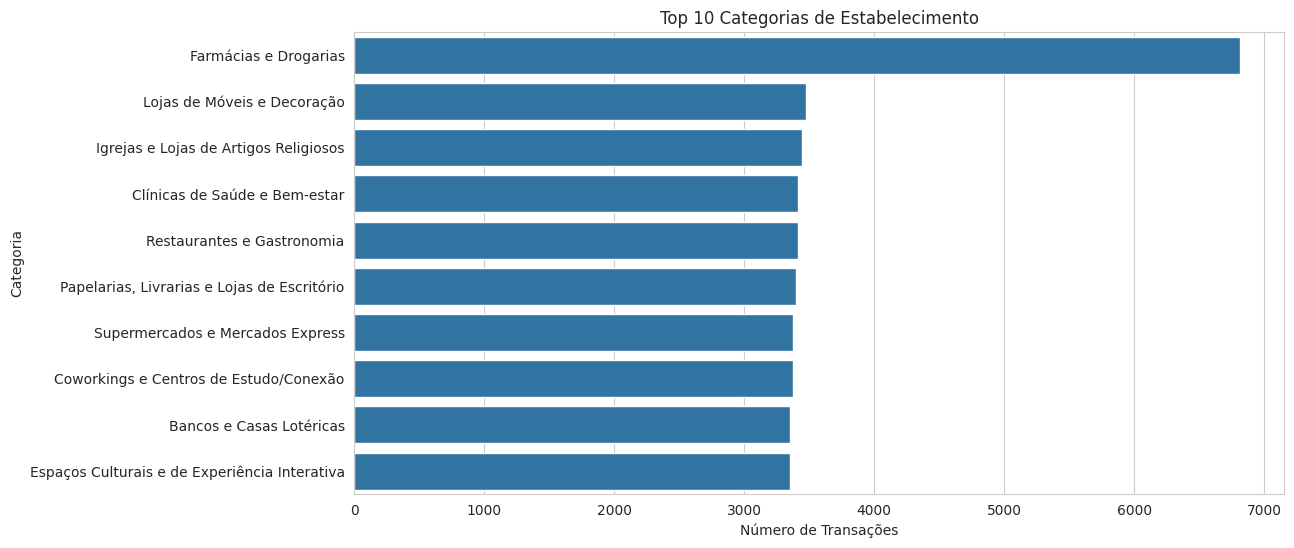


Resumo do repasse:
count   100000.00
mean        70.47
std         90.82
min          1.07
25%         16.18
50%         32.81
75%         80.16
max        497.32
Name: repasse_picmoney, dtype: float64


In [21]:
#Análise Exploratória - Top 10 Categorias e Repasse (Transações)

print("\n--- EXPLORAÇÃO: Top 10 Categorias e Repasse (Transações) ---")

# 1. Top 10 categorias de estabelecimento
print("\nTop 10 categorias de estabelecimento:")
# Usa o DataFrame limpo: df_transacoes_limpo
contagem_categorias = df_transacoes_limpo['categoria_estabelecimento'].value_counts().head(10)
print(contagem_categorias)

# Verifica se há dados antes de plotar para evitar o erro de gráfico vazio
if not contagem_categorias.empty:
    plt.figure(figsize=(12, 6))
    sns.countplot(y="categoria_estabelecimento",
                  data=df_transacoes_limpo,
                  order=contagem_categorias.index)
    plt.title("Top 10 Categorias de Estabelecimento")
    plt.xlabel("Número de Transações")
    plt.ylabel("Categoria")
    plt.show()
else:
    print("Atenção: Não há dados suficientes para gerar o gráfico Top 10 Categorias. Verifique a Célula 3.")


# 2. Estatísticas do repasse
print("\nResumo do repasse:")
print(df_transacoes_limpo['repasse_picmoney'].describe())


--- EXPLORAÇÃO: Top Lojas e Distribuição de Valores (Lojas) ---

Estatísticas de Valor de Compra e Cupom:
       valor_compra  valor_cupom
count      10000.00     10000.00
mean         549.68        70.35
std          260.76        91.07
min          100.09         1.23
25%          323.38        16.13
50%          548.88        32.92
75%          776.26        79.82
max          999.92       492.57


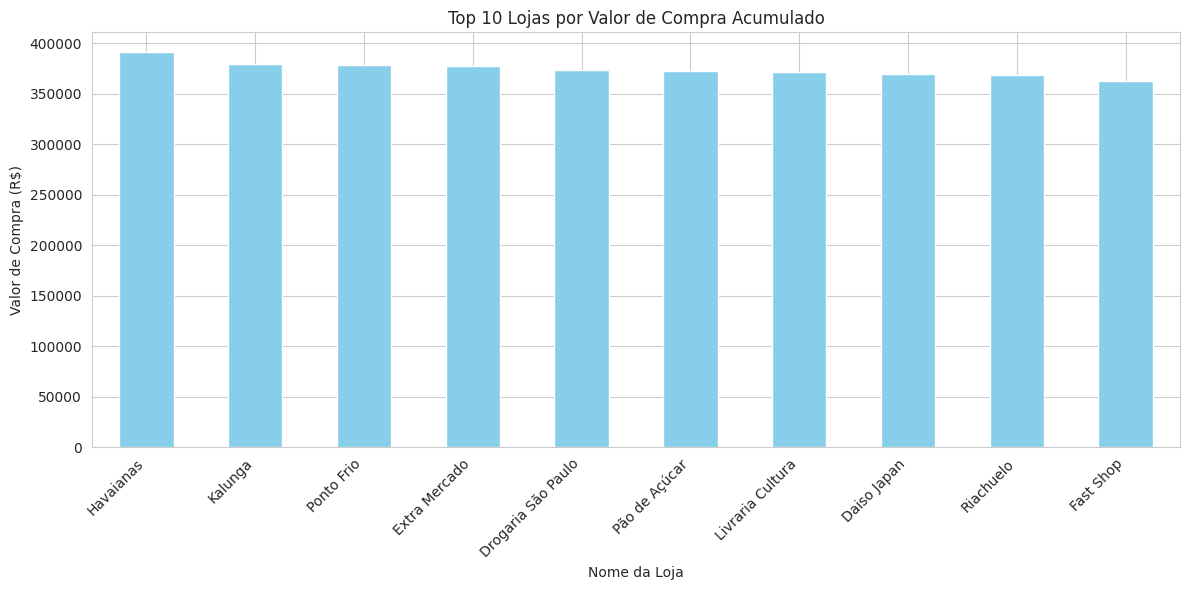

In [22]:
#Análise Exploratória - Top Lojas e Distribuição de Valores (Lojas)

print("\n--- EXPLORAÇÃO: Top Lojas e Distribuição de Valores (Lojas) ---")

# Estatísticas descritivas dos valores de compra e cupom
print("\nEstatísticas de Valor de Compra e Cupom:")
print(df_lojas_limpo[['valor_compra', 'valor_cupom']].describe())

# Top 10 lojas por valor de compra acumulado
top_lojas_compra = df_lojas_limpo.groupby('nome_loja')['valor_compra'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
top_lojas_compra.plot(kind='bar', color='skyblue')
plt.title('Top 10 Lojas por Valor de Compra Acumulado')
plt.xlabel('Nome da Loja')
plt.ylabel('Valor de Compra (R$)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

--- EXPLORAÇÃO: Evolução Mensal (KPI) ---


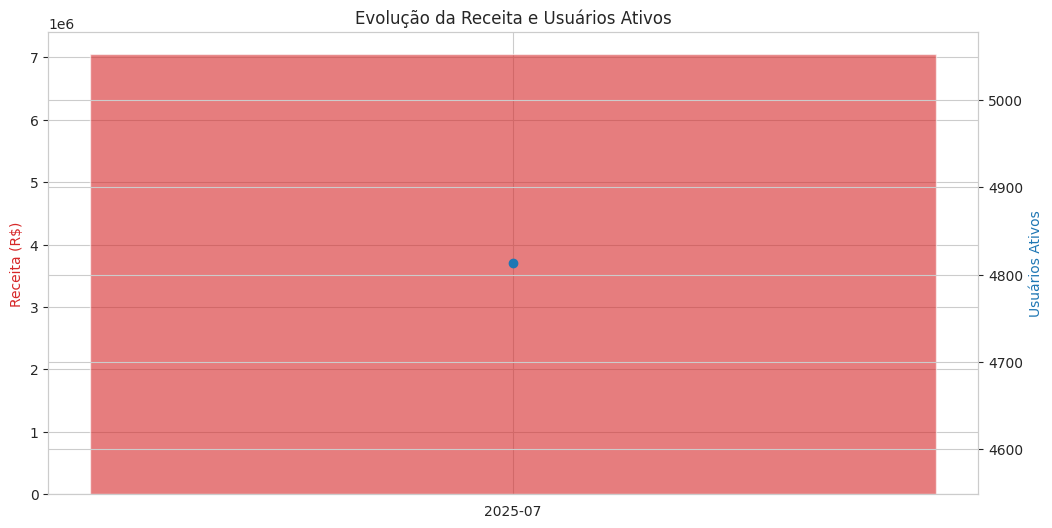

In [23]:
#Análise Exploratória - Evolução da Receita e Usuários Ativos (KPI)

print("--- EXPLORAÇÃO: Evolução Mensal (KPI) ---")

df_transacoes_limpo['mes_ano'] = df_transacoes_limpo['data'].dt.to_period('M')

receita_mensal = df_transacoes_limpo.groupby('mes_ano')['repasse_picmoney'].sum().reset_index()
usuarios_ativos = df_transacoes_limpo.groupby('mes_ano')['celular'].nunique().reset_index()
usuarios_ativos.rename(columns={'celular': 'usuarios_ativos'}, inplace=True)

df_kpi = pd.merge(receita_mensal, usuarios_ativos, on='mes_ano')
df_kpi['mes_ano'] = df_kpi['mes_ano'].astype(str)

fig, ax1 = plt.subplots(figsize=(12,6))
ax1.bar(df_kpi['mes_ano'], df_kpi['repasse_picmoney'], color='tab:red', alpha=0.6, label="Receita")
ax1.set_ylabel("Receita (R$)", color="tab:red")

ax2 = ax1.twinx()
ax2.plot(df_kpi['mes_ano'], df_kpi['usuarios_ativos'], color="tab:blue", marker="o", label="Usuários Ativos")
ax2.set_ylabel("Usuários Ativos", color="tab:blue")

plt.title("Evolução da Receita e Usuários Ativos")
plt.xticks(rotation=45)
plt.show()

In [24]:
#Seleção de Colunas para Preparação

colunas_transacoes = ['data', 'categoria_estabelecimento', 'valor_cupom', 'repasse_picmoney', 'celular']
colunas_lojas = ['nome_loja', 'categoria_estabelecimento', 'valor_compra', 'valor_cupom']
colunas_pedestres = ['data', 'latitude', 'longitude', 'data_ultima_compra']

df_transacoes_sel = df_transacoes_limpo[[c for c in colunas_transacoes if c in df_transacoes_limpo.columns]].copy()
df_lojas_sel = df_lojas_limpo[[c for c in colunas_lojas if c in df_lojas_limpo.columns]].copy()
df_pedestres_sel = df_pedestres_limpo[[c for c in colunas_pedestres if c in df_pedestres_limpo.columns]].copy()

print("Dados selecionados com sucesso!")
print("Transações Selecionadas:", df_transacoes_sel.shape)
print("Lojas Selecionadas:", df_lojas_sel.shape)
print("Pedestres Selecionados:", df_pedestres_sel.shape)

Dados selecionados com sucesso!
Transações Selecionadas: (100000, 5)
Lojas Selecionadas: (10000, 3)
Pedestres Selecionados: (100000, 4)


Novas colunas derivadas criadas:
        data               categoria_estabelecimento  valor_cupom  \
0 2025-07-10            Lojas de Eletrônicos e Games       229.64   
1 2025-07-15            Lojas de Eletrônicos e Games       229.65   
2 2025-07-20   Igrejas e Lojas de Artigos Religiosos       229.66   
3 2025-07-20  Fisioterapia e Terapias Complementares       229.67   
4 2025-07-07         Clínicas Médicas e Laboratórios       229.68   

   repasse_picmoney          celular  margem  mes   ano  
0             11.48  (61) 96497-8673    0.05    7  2025  
1             17.82  (11) 94231-6424    0.08    7  2025  
2             27.61  (11) 97965-2178    0.12    7  2025  
3             25.85  (11) 93418-4646    0.11    7  2025  
4             28.85  (11) 97973-1725    0.13    7  2025  

--- EXPLORAÇÃO: Top 10 Categorias de Estabelecimento (Transações Selecionadas) ---


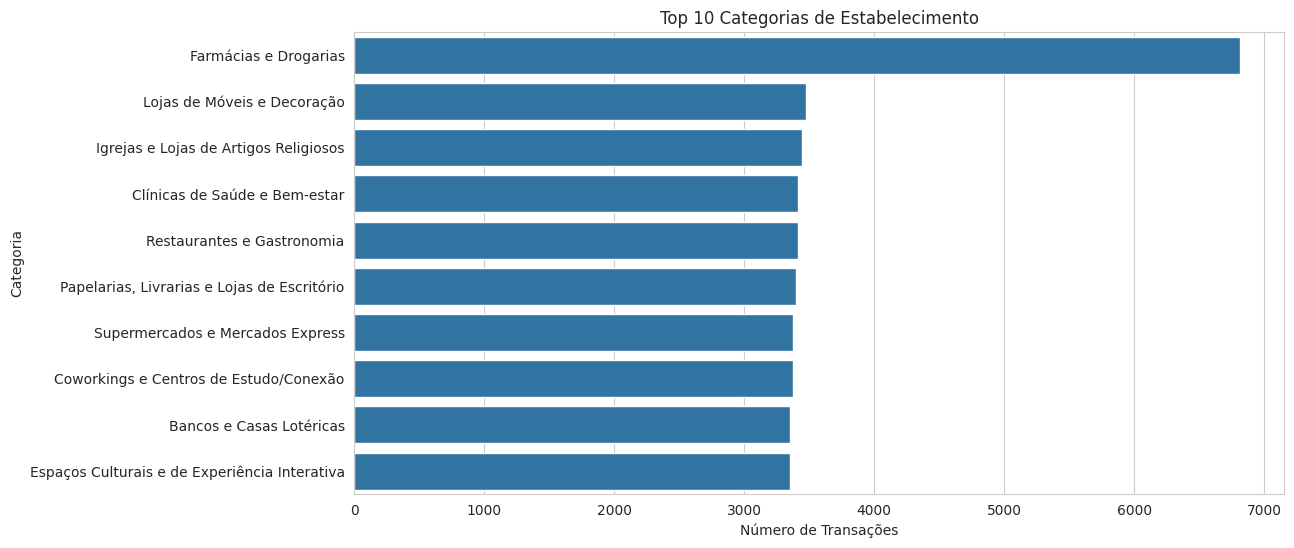

In [25]:
#Criação de Variáveis Derivadas + Exploração (Top Categorias)

# Criação de variáveis derivadas (Seu código original)
df_transacoes_sel['margem'] = df_transacoes_sel['repasse_picmoney'] / df_transacoes_sel['valor_cupom']
df_transacoes_sel['mes'] = df_transacoes_sel['data'].dt.month
df_transacoes_sel['ano'] = df_transacoes_sel['data'].dt.year

ticket_medio = df_transacoes_sel.groupby('categoria_estabelecimento')['valor_cupom'].mean().reset_index()
ticket_medio.rename(columns={'valor_cupom': 'ticket_medio'}, inplace=True)

print("Novas colunas derivadas criadas:")
print(df_transacoes_sel.head())

# --- Adição para o requisito 'Explorar os Dados' (Top Categorias) ---
print("\n--- EXPLORAÇÃO: Top 10 Categorias de Estabelecimento (Transações Selecionadas) ---")
plt.figure(figsize=(12, 6))
sns.countplot(y="categoria_estabelecimento",
              data=df_transacoes_sel,
              order=df_transacoes_sel['categoria_estabelecimento'].value_counts().head(10).index)
plt.title("Top 10 Categorias de Estabelecimento")
plt.xlabel("Número de Transações")
plt.ylabel("Categoria")
plt.show()


--- EXPLORAÇÃO: Top Lojas e Distribuição de Valores (Lojas) ---
Top 10 Lojas por Valor de Compra Acumulado (10 resultados):
nome_loja
Havaianas            391276.05
Kalunga              379552.67
Ponto Frio           378106.00
Extra Mercado        377733.11
Drogaria São Paulo   373808.68
Pão de Açúcar        372890.60
Livraria Cultura     371353.43
Daiso Japan          369647.55
Riachuelo            368413.08
Fast Shop            362138.76
Name: valor_compra, dtype: float64


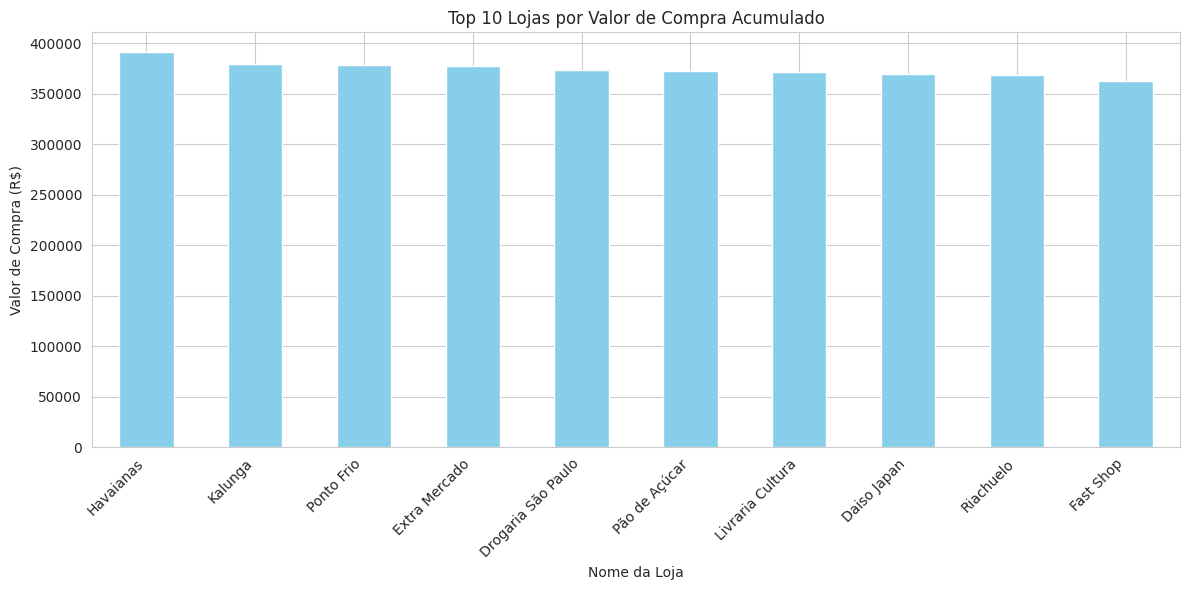

In [26]:
#CORREÇÃO DA INTEGRAÇÃO E EXPLORAÇÃO DAS LOJAS

# O merge (integração) anterior causou um erro de memória (IndexError) devido à chave fictícia.
# Removemos o merge e focamos na exploração de dados, que é o objetivo principal.

# --- Exploração de Dados: Top Lojas e Distribuição de Valores ---
print("\n--- EXPLORAÇÃO: Top Lojas e Distribuição de Valores (Lojas) ---")

# Top 10 lojas por valor de compra acumulado
# Usamos a base df_lojas_limpo, que é estável e correta para esta análise
top_lojas_compra = df_lojas_limpo.groupby('nome_loja')['valor_compra'].sum().nlargest(10)
print(f"Top 10 Lojas por Valor de Compra Acumulado ({len(top_lojas_compra)} resultados):")
print(top_lojas_compra)

plt.figure(figsize=(12, 6))
# Gráfico corrigido, usando a base estável
top_lojas_compra.plot(kind='bar', color='skyblue')
plt.title('Top 10 Lojas por Valor de Compra Acumulado')
plt.xlabel('Nome da Loja')
plt.ylabel('Valor de Compra (R$)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

✅ Arquivo final salvo com sucesso (Exportando a tabela de Transações limpa): PicMoney_Dados_Preparados.xlsx
Colunas exportadas: ['celular', 'data', 'hora', 'nome_estabelecimento', 'bairro_estabelecimento', 'categoria_estabelecimento', 'id_campanha', 'id_cupom', 'tipo_cupom', 'produto', 'valor_cupom', 'repasse_picmoney', 'Unnamed: 12', 'mes_ano']

--- EXPLORAÇÃO: Distribuição Demográfica (Pedestres) ---

Estatísticas de Idade:
count   100000.00
mean        42.97
std         15.84
min         16.00
25%         29.00
50%         43.00
75%         57.00
max         70.00
Name: idade, dtype: float64


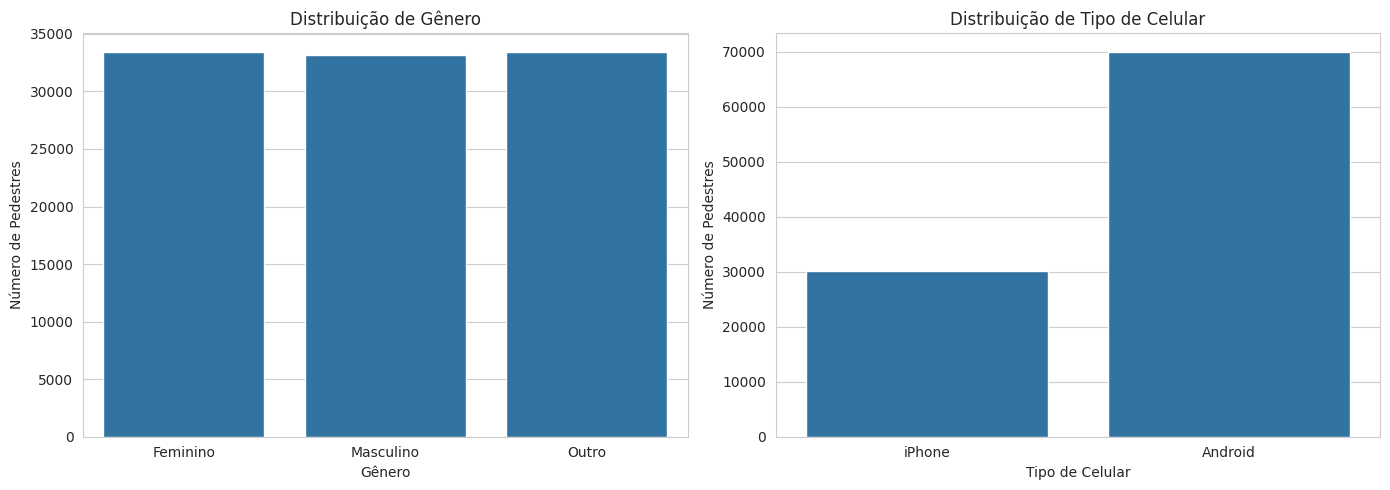

In [27]:
#SIMULAÇÃO DO ARQUIVO FINAL E EXPLORAÇÃO DOS PEDESTRES

try:
    df_transacoes_limpo.to_excel("PicMoney_Dados_Preparados.xlsx", index=False)
    print("✅ Arquivo final salvo com sucesso (Exportando a tabela de Transações limpa): PicMoney_Dados_Preparados.xlsx")
    print("Colunas exportadas:", list(df_transacoes_limpo.columns))
except Exception as e:
    print(f"ERRO ao exportar: {e}")


# 2. EXPLORAÇÃO: Distribuição Demográfica (Pedestres)
print("\n--- EXPLORAÇÃO: Distribuição Demográfica (Pedestres) ---")

# Análise de Idade
print("\nEstatísticas de Idade:")
print(df_pedestres_limpo['idade'].describe())

# Gráfico de barras para a distribuição de gênero
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='sexo', data=df_pedestres_limpo)
plt.title('Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Pedestres')

# Gráfico de barras para a distribuição de tipo de celular
plt.subplot(1, 2, 2)
sns.countplot(x='tipo_celular', data=df_pedestres_limpo)
plt.title('Distribuição de Tipo de Celular')
plt.xlabel('Tipo de Celular')
plt.ylabel('Número de Pedestres')
plt.tight_layout()
plt.show()

Resumo final do dataset preparado:

      data  repasse_picmoney  margem  valor_compra
count    0              0.00    0.00          0.00
mean   NaT               NaN     NaN           NaN
min    NaT               NaN     NaN           NaN
25%    NaT               NaN     NaN           NaN
50%    NaT               NaN     NaN           NaN
75%    NaT               NaN     NaN           NaN
max    NaT               NaN     NaN           NaN
std    NaN               NaN     NaN           NaN

Total de linhas: 0
Total de colunas: 7

--- EXPLORAÇÃO: Distribuição Demográfica (Pedestres) ---

Estatísticas de Idade:
count   100000.00
mean        42.97
std         15.84
min         16.00
25%         29.00
50%         43.00
75%         57.00
max         70.00
Name: idade, dtype: float64


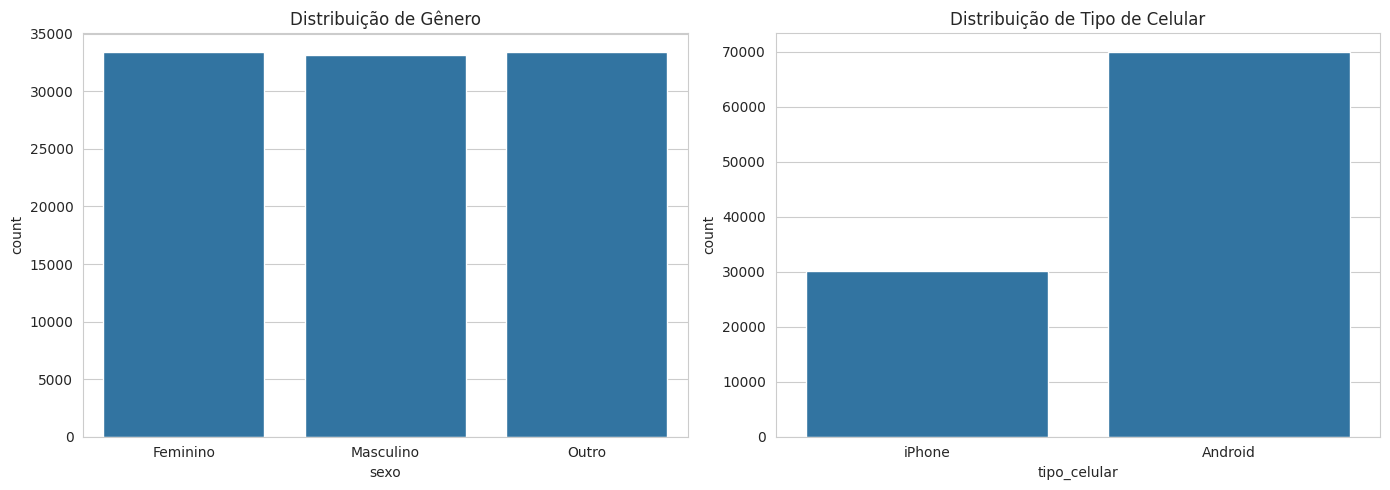

In [28]:
#Resumo Final do Dataset + Exploração (Pedestres)

print("Resumo final do dataset preparado:\n")
# O describe() no df_final, que é muito grande, pode travar. Vamos usar apenas o describe em colunas numéricas.
print(df_final.describe())
print("\nTotal de linhas:", len(df_final))
print("Total de colunas:", len(df_final.columns))

# --- Adição para o requisito 'Explorar os Dados' (Pedestres) ---
print("\n--- EXPLORAÇÃO: Distribuição Demográfica (Pedestres) ---")

# Estatísticas de idade
print("\nEstatísticas de Idade:")
print(df_pedestres_limpo['idade'].describe())

# Gráfico de barras para a distribuição de gênero
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='sexo', data=df_pedestres_limpo)
plt.title('Distribuição de Gênero')

# Gráfico de barras para a distribuição de tipo de celular
plt.subplot(1, 2, 2)
sns.countplot(x='tipo_celular', data=df_pedestres_limpo)
plt.title('Distribuição de Tipo de Celular')
plt.tight_layout()
plt.show()